# NLP (Natural Language Processing)

Computers and machines are great at working with tabular data or spreadsheets. However, as human beings generally communicate in words and sentences, not in the form of tables. Much information that humans speak or write is unstructured. So it is not very clear for computers to interpret such.   
**In natural language processing (NLP), the goal is to make computers understand the unstructured text and retrieve meaningful pieces of information from it. Natural language Processing (NLP) is a subfield of artificial intelligence, in which its depth involves the interactions between computers and humans.**

# SpaCy
spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.  

If you’re working with a lot of text, you’ll eventually want to know more about it. For example, what’s it about? What do the words mean in context? Who is doing what to whom? What companies and products are mentioned? Which texts are similar to each other?  

spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.`

## What spaCy
**spaCy is not a platform or “an API”.** Unlike a platform, spaCy does not provide a software as a service, or a web application. It’s an open-source library designed to help you build NLP applications, not a consumable service.  

**spaCy is not an out-of-the-box chat bot engine.** While spaCy can be used to power conversational applications, it’s not designed specifically for chat bots, and only provides the underlying text processing capabilities.  

**spaCy is not research software.** It’s built on the latest research, but it’s designed to get things done. This leads to fairly different design decisions than _NLTK or CoreNLP,_ which were created as platforms for teaching and research. The main difference is that spaCy is integrated and opinionated. spaCy tries to avoid asking the user to choose between multiple algorithms that deliver equivalent functionality. Keeping the menu small lets spaCy deliver generally better performance and developer experience.

## Features

In the documentation, you’ll come across mentions of spaCy’s features and capabilities. Some of them refer to linguistic concepts, while others are related to more general machine learning functionality.

- **Tokenization**	Segmenting text into words, punctuations marks etc.
- **Part-of-speech (POS) Tagging**	Assigning word types to tokens, like verb or noun.
- **Dependency Parsing**	Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.
- **Lemmatization** Assigning the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.
- **Sentence Boundary Detection (SBD)**	Finding and segmenting individual sentences.
- **Named Entity Recognition (NER)**	Labelling named “real-world” objects, like persons, companies or locations.
- **Entity Linking (EL)**	Disambiguating textual entities to unique identifiers in a Knowledge Base.
- **Similarity**	Comparing words, text spans and documents and how similar they are to each other.
- **Text Classification**	Assigning categories or labels to a whole document, or parts of a document.
- **Rule-based Matching**	Finding sequences of tokens based on their texts and linguistic annotations, similar to regular expressions.
- **Training**	Updating and improving a statistical model’s predictions.
- **Serialization**	Saving objects to files or byte strings.

## Linguistic annotations
spaCy provides a variety of linguistic annotations to give you insights into a text’s grammatical structure. This includes the word types, like the parts of speech, and how the words are related to each other. For example, if you’re analyzing text, it makes a huge difference whether a noun is the subject of a sentence, or the object – or whether “google” is used as a verb, or refers to the website or company in a specific context.

Once you’ve downloaded and installed a model, you can load it via spacy.load(). This will return a Language object containing all components and data needed to process text. We usually call it nlp. Calling the nlp object on a string of text will return a processed Doc:

In [ ]:
!pip install -U spacy

In [2]:
!python -V

Python 3.8.0


In [2]:
import spacy

nlp = spacy.load('en_core_web_sm') --> english_core_web_small  
nlp = spacy.load('en_core_web_lg') --> english_core_web_large

In [3]:
nlp = spacy.load('en_core_web_sm')
print(type(nlp))

<class 'spacy.lang.en.English'>


In [4]:
mydoc = nlp("Apple is looking at buying U.K. startup for $1 billion")
print(type(mydoc))

<class 'spacy.tokens.doc.Doc'>


In [9]:
for mytoken in mydoc:
    # print(mytoken.text, '\t\t', mytoken.pos_, '\t\t', mytoken.dep_)
    print(f'{mytoken.text:15} {mytoken.pos_:15} {mytoken.dep_}')

Apple           PROPN           nsubj
is              AUX             aux
looking         VERB            ROOT
at              ADP             prep
buying          VERB            pcomp
U.K.            PROPN           compound
startup         NOUN            dobj
for             ADP             prep
$               SYM             quantmod
1               NUM             compound
billion         NUM             pobj


### Doc
spacy.tokens.doc.Doc  
A Doc is a sequence of Token objects. Access sentences and named entities, export annotations to numpy arrays, losslessly serialize to compressed binary strings. The Doc object holds an array of TokenC structs. The Python-level Token and Span objects are views of this array, i.e. they don’t own the data themselves.

### Tokenization
During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation

In [6]:
import spacy

nlp = spacy.load('en_core_web_sm')

mydoc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for mytoken in mydoc:
    print(mytoken.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


First, the raw text is split on whitespace characters, similar to text.split(' '). Then, the tokenizer processes the text from left to right. On each substring, it performs two checks:

**Does the substring match a tokenizer exception rule?** For example, “don’t” does not contain whitespace, but should be split into two tokens, “do” and “n’t”, while “U.K.” should always remain one token.  
 
**Can a prefix, suffix or infix be split off?** For example punctuation like commas, periods, hyphens or quotes.  

If there’s a match, the rule is applied and the tokenizer continues its loop, starting with the newly split substrings. This way, spaCy can split complex, nested tokens like combinations of abbreviations and multiple punctuation marks.

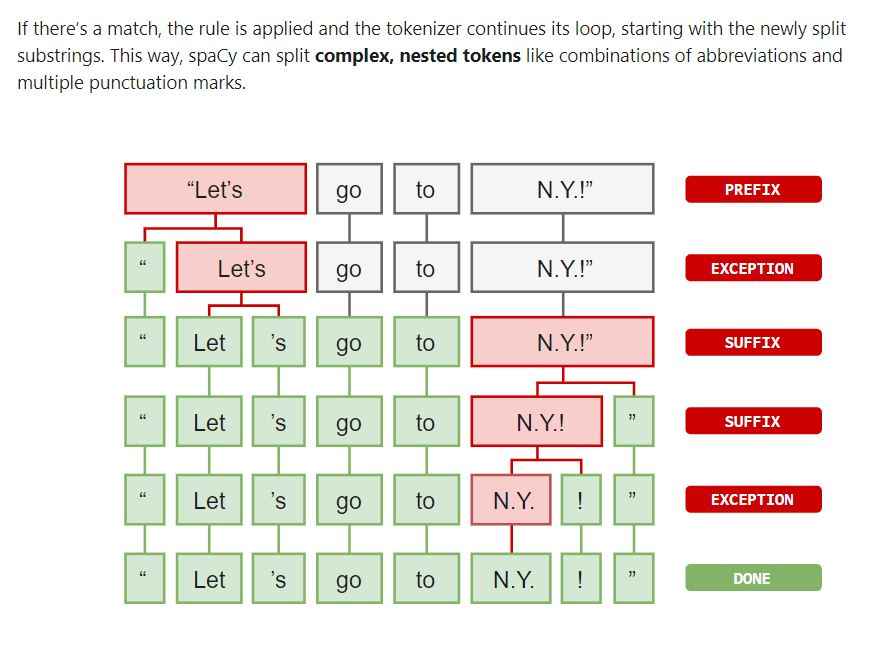

In [20]:
from IPython.display import Image
Image(r'C:\Users\Ankush\Desktop\Python\Meetup\NLP\Tokenization.jpg', width=500, height=500)

### Part-of-Speech tags

**POS -** After tokenization, spaCy can parse and tag a given Doc. This is where the statistical model comes in, which enables spaCy to make a prediction of which tag or label most likely applies in this context. 

_POS tagging is done by assigning word types to tokens, like a verb or noun._

In [10]:
import spacy

nlp = spacy.load('en_core_web_sm')

mydoc = nlp("Apple is looking at buying U.K. startup for $1 billion")

print('head : ', mydoc[2].head)
print('word : ', mydoc[2].text)
print('Part of speech code : ', mydoc[2].pos)
print('Part of speech value : ', mydoc[2].pos_)

head :  looking
word :  looking
Part of speech code :  100
Part of speech value :  VERB


In [11]:
print('\n\nWord \t\t POS Code \t\t POS Tag')
for mytoken in mydoc:
    print(mytoken.text, '\t\t', mytoken.pos, '\t\t\t', mytoken.pos_)



Word 		 POS Code 		 POS Tag
Apple 		 96 			 PROPN
is 		 87 			 AUX
looking 		 100 			 VERB
at 		 85 			 ADP
buying 		 100 			 VERB
U.K. 		 96 			 PROPN
startup 		 92 			 NOUN
for 		 85 			 ADP
$ 		 99 			 SYM
1 		 93 			 NUM
billion 		 93 			 NUM


### Dependency Parsing 

Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.

In [12]:
import spacy

nlp = spacy.load('en_core_web_sm')

mydoc = nlp("Apple is looking at buying U.K. startup for $1 billion")
print('Word \t\t Dependency')

for mytoken in mydoc:
    # print(mytoken.text, '\t\t\t', mytoken.dep_)
    print(f'{mytoken.text:18} {mytoken.dep_}')

Word 		 Dependency
Apple              nsubj
is                 aux
looking            ROOT
at                 prep
buying             pcomp
U.K.               compound
startup            dobj
for                prep
$                  quantmod
1                  compound
billion            pobj


### Lemmatization 

It convert the word into its root word.  
better - good

In [23]:
import spacy

nlp = spacy.load('en_core_web_sm')

mydoc = nlp("Apple is looking at buying U.K. startup for $1 billion")
print('Word \t\t\t Lemmatization')

for mytoken in mydoc:
    print(mytoken.text, '\t\t\t', mytoken.lemma_)

Word 			 Lemmatization
Apple 			 Apple
is 			 be
looking 			 look
at 			 at
buying 			 buy
U.K. 			 U.K.
startup 			 startup
for 			 for
$ 			 $
1 			 1
billion 			 billion


### Sentence Boundary Detection

**SBD or Sentence Segmentation -** This is the process of identifying and splitting text into individual sentences.  
  
Typically, most NLP libraries use a rule-based approach when obtaining sentence boundaries. However spaCy follows a different approach for this task.  
  
**spaCy uses dependency parsing in order to detect sentences using the statistical model.** This is more accurate than the classical rule-based approach.  
Traditional rule-based sentence splitting will work on general purpose text, but may not work as intended when it comes to social media or conversational text. Since spaCy uses a prediction-based approach, the accuracy of sentence splitting tends to be higher.

In [21]:
import spacy

nlp = spacy.load('en_core_web_sm')

mydoc = nlp("Success is not final. Failure is not fatal. It is the courage to continue that counts.")

for mytoken in mydoc.sents:
    print(mytoken)

Success is not final.
Failure is not fatal.
It is the courage to continue that counts.


In [22]:
mydoc = nlp(u"Success is not final :) :) Failure is not fatal? It is the courage to continue that counts !!!")
for sent in mydoc.sents:
    print(sent)

Success is not final :) :)
Failure is not fatal?
It is the courage to continue that counts !!!


### Named Entity Recognition

NER is done by labeling words/tokens—named “real-world” objects—like _persons, companies, or locations_.  
The predictions of these entities might not always work perfectly because the statistical model may not be trained on the examples that you require. In such a case, you can tune the model to suit your needs.

In [31]:
import spacy

nlp = spacy.load('en_core_web_sm')

mydoc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for myner in mydoc.ents:
    print(myner.text, '\t\t', myner.label_, '\t\t', myner.start_char, '\t\t', myner.end_char)


Apple 		 ORG 		 0 		 5
U.K. 		 GPE 		 27 		 31
$1 billion 		 MONEY 		 44 		 54


In [32]:
mydoc = nlp(u"I am planning to go to London in the morning at 10am, I have to buy a HP laptop and 2 speakers for less than 1000 dollars. I hope America and China tradewar won't affect prices.")

for myner in mydoc.ents:
  print(myner.text, '\t\t', myner.label_, '\t\t', myner.start_char, '\t\t', myner.end_char)

London 		 GPE 		 23 		 29
the morning 		 TIME 		 33 		 44
10am 		 TIME 		 48 		 52
HP 		 FAC 		 70 		 72
2 		 CARDINAL 		 84 		 85
less than 1000 dollars 		 MONEY 		 99 		 121
America 		 GPE 		 130 		 137
China 		 GPE 		 142 		 147


### Word Vectors Similarity

Word vectors similarity is determined by comparing word vector representations of a word. Word vectors can be generated by using an algorithm like word2vec.  

This feature also needs the statistical model. However, the default model doesn’t come with word vectors. So you’ll have to download a larger model for that.

In [ ]:
!python -m spacy download en_core_web_lg

In [65]:
import spacy

nlp = spacy.load('en_core_web_lg')

mydoc = nlp("Apple is looking at buying U.K. dghfgdf startup for $1 billion")

for token in mydoc:
    print(token.text, '\t\t', token.has_vector, '\t\t', token.vector_norm, '\t\t', token.is_oov)

Apple 		 True 		 7.1346846 		 False
is 		 True 		 4.890306 		 False
looking 		 True 		 5.4164834 		 False
at 		 True 		 6.0998254 		 False
buying 		 True 		 6.2184978 		 False
U.K. 		 True 		 7.029792 		 False
dghfgdf 		 False 		 0.0 		 True
startup 		 True 		 6.779131 		 False
for 		 True 		 4.8435082 		 False
$ 		 True 		 7.748268 		 False
1 		 True 		 5.269974 		 False
billion 		 True 		 8.310136 		 False


In [8]:
mydoc = nlp("dog cat banana afskfsd")

for token in mydoc:
    print(token.text, '\t\t', token.has_vector, '\t\t', token.vector_norm, '\t\t', token.is_oov)

dog 		 True 		 7.0336733 		 False
cat 		 True 		 6.6808186 		 False
banana 		 True 		 6.700014 		 False
afskfsd 		 False 		 0.0 		 True


- **has_vector -** Whether the document has a vector data attached.
- **vector_norm -** norm of the vector representation.
- **is_oov -** Does the token have a word vector?

- **Similarity -** Compute a semantic similarity estimate. Defaults to cosine over vectors.

In [66]:
tokens = nlp("dog cat banana")

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 1.0
dog cat 0.80168545
dog banana 0.24327643
cat dog 0.80168545
cat cat 1.0
cat banana 0.28154364
banana dog 0.24327643
banana cat 0.28154364
banana banana 1.0


In above case, the model’s predictions are pretty on point. A dog is very similar to a cat, whereas a banana is not very similar to either of them. Identical tokens are obviously 100% similar to each other (just not always exactly 1.0, because of vector math and floating point imprecisions).

In [13]:
tokens = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

Apple Apple 1.0
Apple is 0.19535309
Apple looking 0.21951997
Apple at 0.11479189
Apple buying 0.27212766
Apple U.K. 0.043378025
Apple startup 0.18823951
Apple for 0.21156938
Apple $ 0.06360258
Apple 1 0.19904068
Apple billion 0.12356149
is Apple 0.19535309
is is 1.0
is looking 0.4093463
is at 0.31555554
is buying 0.2805932
is U.K. -0.12087543
is startup 0.19845885
is for 0.42074078
is $ 0.18009147
is 1 0.17748526
is billion 0.2038912
looking Apple 0.21951997
looking is 0.4093463
looking looking 1.0
looking at 0.28069177
looking buying 0.5064671
looking U.K. -0.05174632
looking startup 0.18348344
looking for 0.51518685
looking $ 0.11889456
looking 1 0.11743145
looking billion 0.13418859
at Apple 0.11479189
at is 0.31555554
at looking 0.28069177
at at 1.0
at buying 0.20612593
at U.K. -0.101590775
at startup 0.14906418
at for 0.32432657
at $ 0.18878293
at 1 0.20370494
at billion 0.10851619
buying Apple 0.27212766
buying is 0.2805932
buying looking 0.5064671
buying at 0.20612593
buying buy

## Pipeline

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.

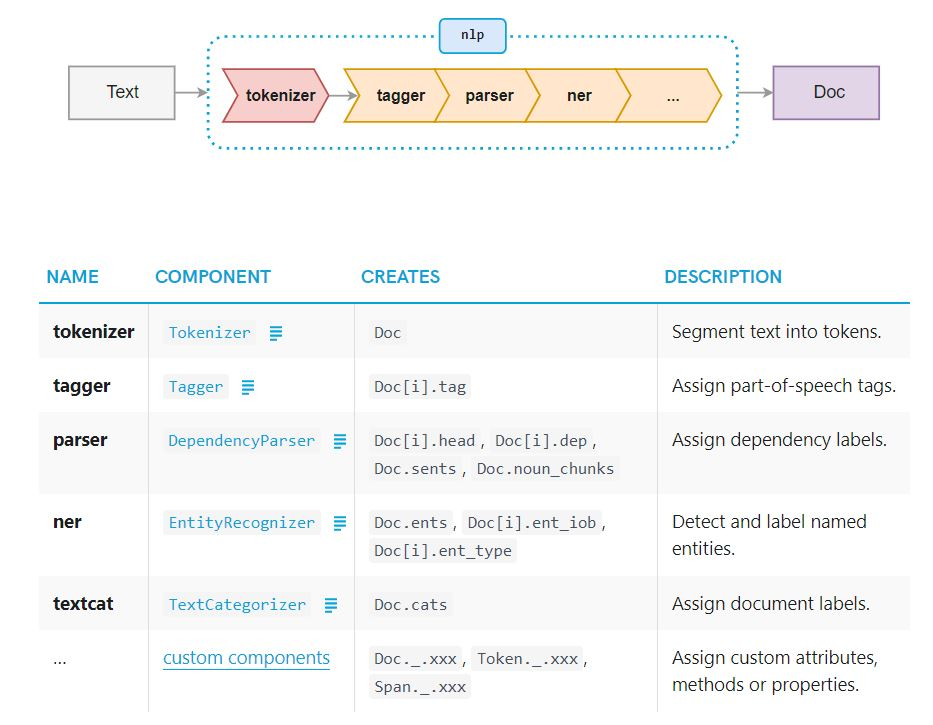

In [22]:
from IPython.display import Image
Image(r'C:\Users\Ankush\Desktop\Python\Meetup\NLP\Pipeline.jpg', width=600, height=600)

In [4]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [6]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x28ebe7be8e0>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x28ebc93c160>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x28ebc93c100>)]

In [7]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [8]:
import spacy

nlp = spacy.load('en_core_web_lg')

mydoc = nlp("Knowledge shelf isn't my youtube channel.")

for mytoken in mydoc:
    print(mytoken.text, '\t\t', mytoken.pos_, '\t\t', mytoken.dep_)

Knowledge 		 NOUN 		 compound
shelf 		 NOUN 		 nsubj
is 		 AUX 		 ROOT
n't 		 PART 		 neg
my 		 DET 		 poss
youtube 		 PROPN 		 compound
channel 		 NOUN 		 attr
. 		 PUNCT 		 punct


In [9]:
mydoc[2].tag_

'VBZ'

In [14]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
mydoc = nlp("Knowledge shelf isn't my youtube channel.")

In [ ]:
mytext = ['This is raw text', 'There are lot of text']
mydoc = list(nlp.pipe(mytext))

Below statement output is same  
 
- mydoc = nlp("Knowledge shelf isn't my youtube channel.")  **- This is one by one process**  
or  
- mytext = ['This is raw text', 'There are lot of text']  
mydoc = list(nlp.pipe(mytext)) **- This is batch process**

- When you call nlp on a text, spaCy will tokenize it and then call each component on the Doc, in order. It then returns the processed Doc that you can work with. (This is one by one process)  
**_doc = nlp("This is a text")_**  
  
  
- When processing large volumes of text, the statistical models are usually more efficient if you let them work on batches of texts. spaCy’s nlp.pipe method takes an iterable of texts and yields processed Doc objects. The batching is done internally. (This is batch process)  
docs = [nlp(text) for text in texts] == **_docs = list(nlp.pipe(texts))_**

In [25]:
import spacy
nlp = spacy.load('en_core_web_sm')
mytext = [
    "john net income was $9.4 million compared to the prior year of $2.7 million.",
    "Revenue exceeded twelve billion dollars, with a loss of $1b.",
]

docs = nlp.pipe(mytext, disable=["tagger", "parser"])     # take only NER & we disabled tagging and parsing


# for mydoc in docs:
#     for myent in mydoc.ents:
#         print(myent.text, '\t\t\t', myent.label_)

for mydoc in docs:
    print([(ent.text, ent.label_) for ent in mydoc.ents])

[('john net', 'PERSON'), ('$9.4 million', 'MONEY'), ('the prior year', 'DATE'), ('$2.7 million', 'MONEY')]
[('twelve billion dollars', 'MONEY'), ('1b', 'MONEY')]


### How pipelines work
spaCy makes it very easy to create your own pipelines consisting of reusable components – this includes spaCy’s default tagger, parser and entity recognizer, but also your own custom processing functions. A pipeline component can be added to an already existing nlp object, specified when initializing a Language class, or defined within a model package.  

When you load a model, spaCy first consults the model’s meta.json. The meta typically includes the model details, the ID of a language class, and an optional list of pipeline components. spaCy then does the following:  
1. Load the **language class and data** for the given ID via get_lang_class and initialize it. The Language class contains the shared vocabulary, tokenization rules and the language-specific annotation scheme.  
2. Iterate over the **pipeline names** and create each component using create_pipe, which looks them up in Language.factories.  
3. Add each pipeline component to the pipeline in order, using add_pipe.  
4. Make the **model data** available to the Language class by calling from_disk with the path to the model data directory.

### Disabling and modifying pipeline components
If you don’t need a particular component of the pipeline – for example, the tagger or the parser, you can disable loading it. This can sometimes make a big difference and improve loading speed. Disabled component names can be provided to spacy.load, Language.from_disk or the nlp object itself as a list:  
  
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser"])  
nlp = English().from_disk("/model", disable=["ner"])

## Vocab, hashes and lexemes
Whenever possible, spaCy tries to store data in a vocabulary, the Vocab, that will be shared by multiple documents. To save memory, spaCy also encodes all strings to hash values – in this case for example, “coffee” has the hash 3197928453018144401. Entity labels like “ORG” and part-of-speech tags like “VERB” are also encoded. Internally, spaCy only “speaks” in hash values.

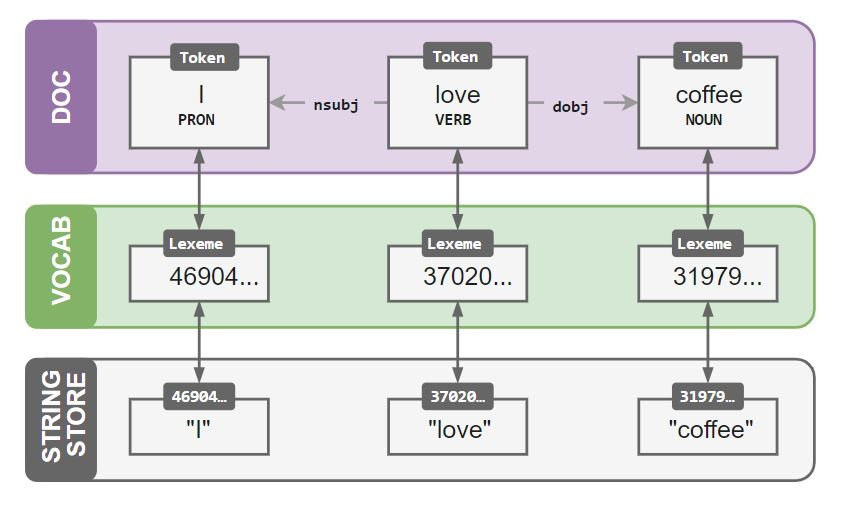

In [27]:
from IPython.display import Image
Image(r'C:\Users\Ankush\Desktop\Python\Meetup\NLP\Vocab.jpg', width=500, height=500)

In [28]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
print(doc.vocab.strings["coffee"])  # 3197928453018144401
print(doc.vocab.strings[3197928453018144401])  # 'coffee'

3197928453018144401
coffee


In [30]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
for word in doc:
    lexeme = doc.vocab[word.text]
    print(lexeme.text, lexeme.orth, lexeme.prefix_, lexeme.suffix_,lexeme.is_digit, lexeme.is_title, lexeme.lang_)

I 4690420944186131903 I I False True en
love 3702023516439754181 l ove False False en
coffee 3197928453018144401 c fee False False en


The mapping of words to hashes doesn’t depend on any state. To make sure each value is unique, spaCy uses a hash function to calculate the hash based on the word string. This also means that the hash for “coffee” will always be the same, no matter which model you’re using or how you’ve configured spaCy.  
  
However, hashes cannot be reversed and there’s no way to resolve 3197928453018144401 back to “coffee”. All spaCy can do is look it up in the vocabulary. That’s why you always need to make sure all objects you create have access to the same vocabulary. If they don’t, spaCy might not be able to find the strings it needs.

In [36]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp("I love coffee")

print(doc.vocab.strings["coffee"])
print(doc.vocab.strings[3197928453018144401])

empty_doc = spacy.tokens.Doc(spacy.vocab.Vocab())  # New Doc with empty Vocab
# empty_doc.vocab.strings[3197928453018144401] will raise an error

empty_doc.vocab.strings.add("coffee")   # Add "coffee" and generate hash
print(empty_doc.vocab.strings[3197928453018144401])

new_doc = spacy.tokens.Doc(doc.vocab)  # Create new doc with first doc's vocab
print(new_doc.vocab.strings[3197928453018144401]) 


3197928453018144401
coffee
coffee
coffee


## Knowledge Base
To support the entity linking task, spaCy stores external knowledge in a KnowledgeBase. The knowledge base (KB) uses the Vocab to store its data efficiently.  
  
A knowledge base is created by first adding all entities to it. Next, for each potential mention or alias, a list of relevant KB IDs and their prior probabilities is added. The sum of these prior probabilities should never exceed 1 for any given alias.

## Serialization
If you’ve been modifying the pipeline, vocabulary, vectors and entities, or made updates to the model, you’ll eventually want to save your progress – for example, **everything that’s in your nlp object**. This means you’ll have to translate its contents and structure into a format that can be saved, like a file or a byte string. This process is called serialization. spaCy comes with built-in serialization methods and supports the Pickle protocol.

## Visualization

In [24]:
from spacy import displacy
import spacy

nlp = spacy.load('en_core_web_sm')

mydoc = nlp("Apple is looking at buying U.K. startup for $1 billion")

In [25]:
displacy.render(mydoc, style='dep')

In [29]:
displacy.render(mydoc, style='dep', options={'compact':True, 'distance':90})

In [30]:
displacy.render(mydoc, style='ent')

## Some Practice Examples

### Get tokens, noun chunks & sentences 

In [49]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Peach emoji is where it has always been. Peach is the superior "
          "emoji. It's outranking eggplant 🍑 ")
print(doc[0].text)          # 'Peach'
print(doc[1].text)          # 'emoji'
print(doc[-1].text)         # '🍑'
print(doc[17:19].text, '\n')      # 'outranking eggplant'

for mypos in doc:
    print(mypos.text, '\t\t', mypos.pos_)

noun_chunks = list(doc.noun_chunks)
print('\n', noun_chunks[0].text)  # 'Peach emoji'
print(noun_chunks)

sentences = list(doc.sents)
print('\n', sentences)

assert len(sentences) == 3
print(sentences[1].text)    # 'Peach is the superior emoji.'

Peach
emoji
🍑
outranking eggplant 

Peach 		 PROPN
emoji 		 PROPN
is 		 AUX
where 		 ADV
it 		 PRON
has 		 AUX
always 		 ADV
been 		 AUX
. 		 PUNCT
Peach 		 PROPN
is 		 AUX
the 		 DET
superior 		 ADJ
emoji 		 PROPN
. 		 PUNCT
It 		 PRON
's 		 AUX
outranking 		 VERB
eggplant 		 ADJ
🍑 		 NOUN

 Peach
[Peach, it, Peach, the superior emoji, It]

 [Peach emoji is where it has always been., Peach is the superior emoji., It's outranking eggplant 🍑]
Peach is the superior emoji.


### Get part-of-speech tags and flags 

In [56]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

apple = doc[0]
print("Word text :", apple.text)
print("Fine-grained POS tag :", apple.pos_, apple.pos)
print("Coarse-grained POS tag :", apple.tag_, apple.tag)
print("Word shape :", apple.shape_, apple.shape)
print("Alphabetic characters? :", apple.is_alpha)
print("Punctuation mark? :", apple.is_punct)

billion = doc[10]
print("Digit?", billion.is_digit)
print("Like a number?", billion.like_num)
print("Like an email address?", billion.like_email)

Word text : Apple
Fine-grained POS tag : PROPN 96
Coarse-grained POS tag : NNP 15794550382381185553
Word shape : Xxxxx 16072095006890171862
Alphabetic characters? : True
Punctuation mark? : False
Digit? False
Like a number? True
Like an email address? False


### Use hash values for any string

In [57]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")

coffee_hash = nlp.vocab.strings["coffee"]  # 3197928453018144401
coffee_text = nlp.vocab.strings[coffee_hash]  # 'coffee'
print(coffee_hash, coffee_text)
print(doc[2].orth, coffee_hash)  # 3197928453018144401
print(doc[2].text, coffee_text)  # 'coffee'

beer_hash = doc.vocab.strings.add("beer")  # 3073001599257881079
beer_text = doc.vocab.strings[beer_hash]  # 'beer'
print(beer_hash, beer_text)

unicorn_hash = doc.vocab.strings.add("🦄")  # 18234233413267120783
unicorn_text = doc.vocab.strings[unicorn_hash]  # '🦄'
print(unicorn_hash, unicorn_text)

3197928453018144401 coffee
3197928453018144401 3197928453018144401
coffee coffee
3073001599257881079 beer
18234233413267120783 🦄


### Recognize and update named entities

In [58]:
import spacy
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
doc = nlp("San Francisco considers banning sidewalk delivery robots")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

San Francisco 0 13 GPE


In [59]:
doc = nlp("FB is hiring a new VP of global policy")
doc.ents = [Span(doc, 0, 1, label="ORG")]

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

FB 0 2 ORG


### Get word vectors and similarity 

In [69]:
import spacy

nlp = spacy.load("en_core_web_lg")
doc = nlp("Apple and banana are similar. Pasta and hippo aren't.")

apple = doc[0]
banana = doc[2]
pasta = doc[6]
hippo = doc[8]

print("apple <-> banana", apple.similarity(banana))
print("pasta <-> hippo", pasta.similarity(hippo), '\n')
print(apple.has_vector, banana.has_vector, pasta.has_vector, hippo.has_vector)


apple <-> banana 0.5831845
pasta <-> hippo 0.079349115 

True True True True


### Simple and efficient serialization

In [70]:
import spacy
from spacy.tokens import Doc
from spacy.vocab import Vocab

nlp = spacy.load("en_core_web_sm")
customer_feedback = open("customer_feedback_627.txt").read()
doc = nlp(customer_feedback)
doc.to_disk("/tmp/customer_feedback_627.bin")

new_doc = Doc(Vocab()).from_disk("/tmp/customer_feedback_627.bin")

FileNotFoundError: [Errno 2] No such file or directory: 'customer_feedback_627.txt'

### Match text with token rules

In [71]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

def set_sentiment(matcher, doc, i, matches):
    doc.sentiment += 0.1

pattern1 = [{"ORTH": "Google"}, {"ORTH": "I"}, {"ORTH": "/"}, {"ORTH": "O"}]
pattern2 = [[{"ORTH": emoji, "OP": "+"}] for emoji in ["😀", "😂", "🤣", "😍"]]
matcher.add("GoogleIO", None, pattern1)  # Match "Google I/O" or "Google i/o"
matcher.add("HAPPY", set_sentiment, *pattern2)  # Match one or more happy emoji

doc = nlp("A text about Google I/O 😀😀")
matches = matcher(doc)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(string_id, span.text)
    
print("Sentiment", doc.sentiment)

GoogleIO Google I/O
HAPPY 😀
HAPPY 😀😀
HAPPY 😀
Sentiment 0.30000001192092896
